In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy as sp
import numpy as np
import warnings
import pySingleCellNet as pySCN

warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80)

C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [2]:
e135 = sc.read("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [3]:
e135.obs['timepoint']=="E13.5"

qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0    False
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0    False
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0    False
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0    False
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0    False
                                        ...  
qb_E17-5_gdf:TTGCGTCGTGTGGTTTx-1-1      False
qb_E17-5_gdf:TTTGTCACATCCCACTx-1-1      False
qb_E17-5_gdf:TTGGCAATCACAACGTx-1-1      False
qb_E17-5_gdf:TTTGGTTTCGACGGAAx-1-1      False
qb_E17-5_gdf:TTGGCAAAGTGGGCTAx-1-1      False
Name: timepoint, Length: 12096, dtype: bool

In [4]:
indicator = e135.obs["timepoint"]=="e13.5"
e135 = e135[indicator,:]

In [5]:
e135.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e135_raw.h5ad")

In [6]:
e135

View of AnnData object with n_obs × n_vars = 4188 × 31065
    obs: 'timepoint', 'ann1', 'level1', 'level2', 'level3', 'topLevel', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [7]:
e135.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch
qb_E13-5_gdf:AAACCTGAGTTGCAGGx-1-0-0,e13.5,joint,SC2,SC2_A,SC2_A3,GLE,0
qb_E13-5_gdf:AAACCTGGTAAGTGTAx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A4,GLE,0
qb_E13-5_gdf:AAACCTGGTCTTGCGGx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A3,GLE,0
qb_E13-5_gdf:AAACCTGGTGGGTCAAx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A3,GLE,0
qb_E13-5_gdf:AAACCTGTCAAAGTAGx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A1,GLE,0
...,...,...,...,...,...,...,...
qb_E13-5_gdf:TTTGTCAAGTCCAGGAx-1-0-1,e13.5,ncc,ncc,ncc,ncc,non-GLE,1
qb_E13-5_gdf:TTTGTCACATGGATGGx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1
qb_E13-5_gdf:TTTGTCACATTGGGCCx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1
qb_E13-5_gdf:TTTGTCAGTATCGCATx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1


In [8]:
e135.obs_names

Index(['qb_E13-5_gdf:AAACCTGAGTTGCAGGx-1-0-0',
       'qb_E13-5_gdf:AAACCTGGTAAGTGTAx-1-0-0',
       'qb_E13-5_gdf:AAACCTGGTCTTGCGGx-1-0-0',
       'qb_E13-5_gdf:AAACCTGGTGGGTCAAx-1-0-0',
       'qb_E13-5_gdf:AAACCTGTCAAAGTAGx-1-0-0',
       'qb_E13-5_gdf:AAACCTGTCTGAGGGAx-1-0-0',
       'qb_E13-5_gdf:AAACGGGCAGCGTCCAx-1-0-0',
       'qb_E13-5_gdf:AAACGGGGTTGTCTTTx-1-0-0',
       'qb_E13-5_gdf:AAACGGGTCAGTTTGGx-1-0-0',
       'qb_E13-5_gdf:AAAGATGAGAACAATCx-1-0-0',
       ...
       'qb_E13-5_gdf:TTTGGTTAGACAAAGGx-1-0-1',
       'qb_E13-5_gdf:TTTGGTTCAATCACACx-1-0-1',
       'qb_E13-5_gdf:TTTGGTTCATACAGCTx-1-0-1',
       'qb_E13-5_gdf:TTTGGTTCATCCGTGGx-1-0-1',
       'qb_E13-5_gdf:TTTGGTTGTACGCACCx-1-0-1',
       'qb_E13-5_gdf:TTTGTCAAGTCCAGGAx-1-0-1',
       'qb_E13-5_gdf:TTTGTCACATGGATGGx-1-0-1',
       'qb_E13-5_gdf:TTTGTCACATTGGGCCx-1-0-1',
       'qb_E13-5_gdf:TTTGTCAGTATCGCATx-1-0-1',
       'qb_E13-5_gdf:TTTGTCATCTTAACCTx-1-0-1'],
      dtype='object', length=4188)

In [9]:
e135.var

,Accession,Chromosome,End,Start,Strand
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-
Rp1,ENSMUSG00000025900,1,4409241,3999557,-
Sox17,ENSMUSG00000025902,1,4497354,4490931,-
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-
...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+


# QC

In [10]:
#checks if the gene name (var) starts with 'mt' or 'ribo' via string methods
e135.var['mt']= e135.var_names.str.startswith(("mt-"))
print(sum(e135.var['mt']))

13


In [11]:
e135.var['ribo'] = e135.var_names.str.startswith(("Rps","Rpl"))
print(sum(e135.var['ribo']))

105


In [12]:
e135.var

,Accession,Chromosome,End,Start,Strand,mt,ribo
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-,False,False
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-,False,False
Rp1,ENSMUSG00000025900,1,4409241,3999557,-,False,False
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,False,False
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-,False,False
...,...,...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+,False,False
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+,False,False
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+,False,False
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+,False,False


In [13]:
sc.pp.calculate_qc_metrics(e135, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

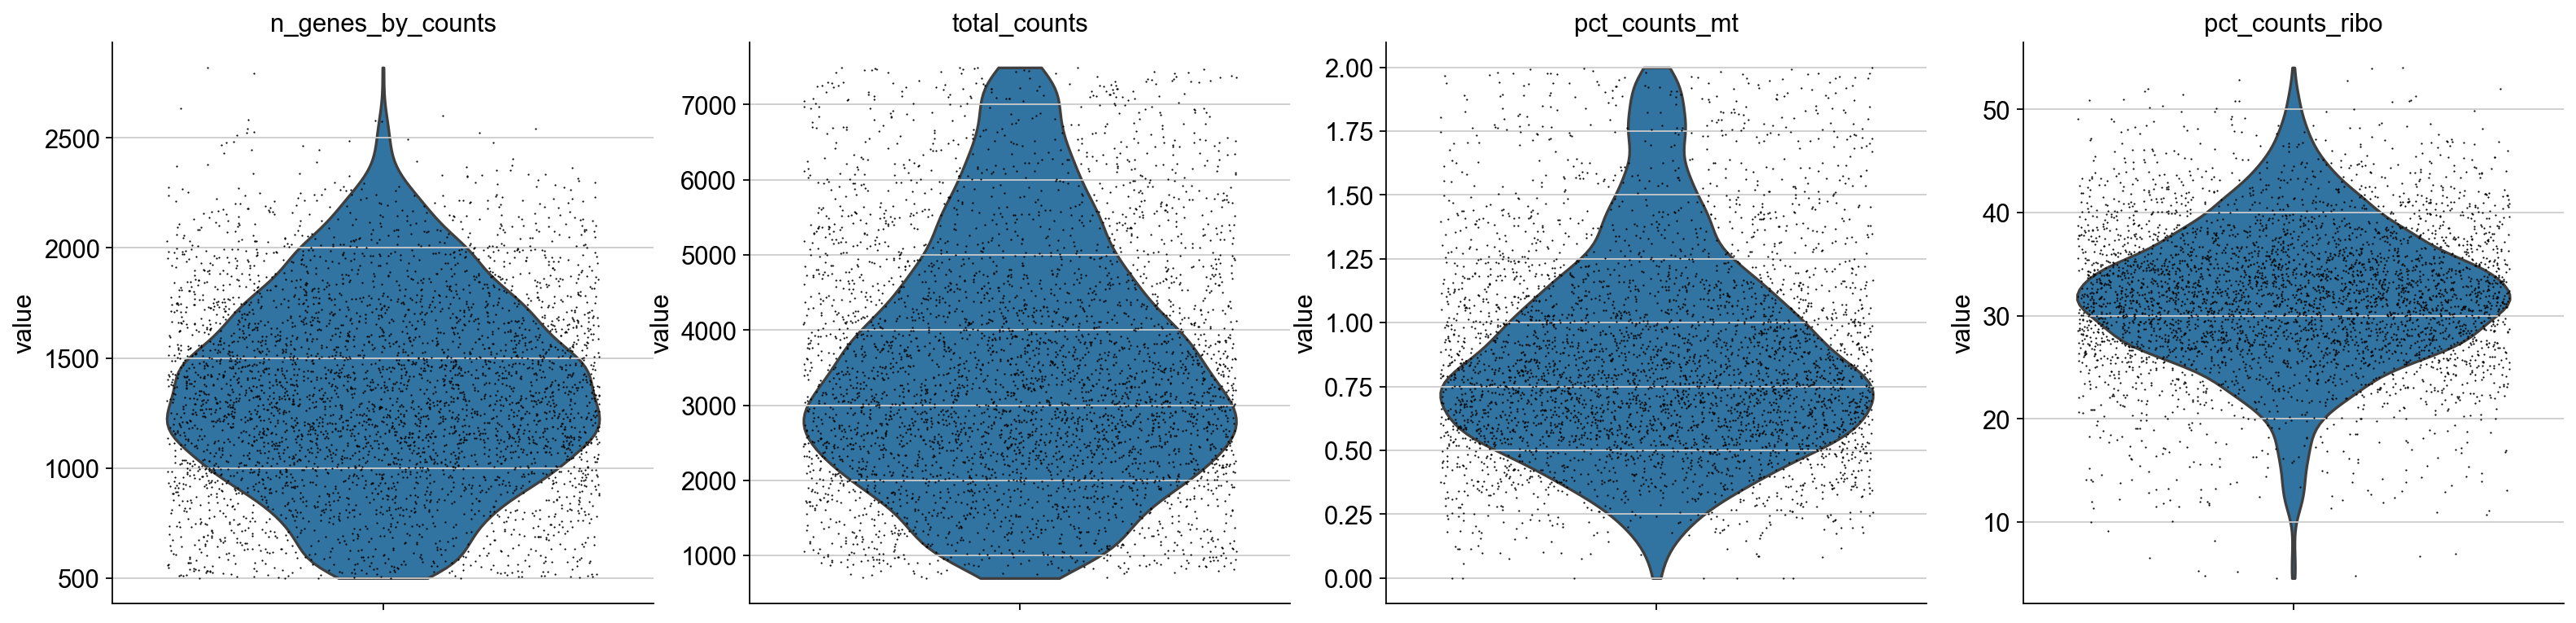

In [14]:
axs = sc.pl.violin(e135, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

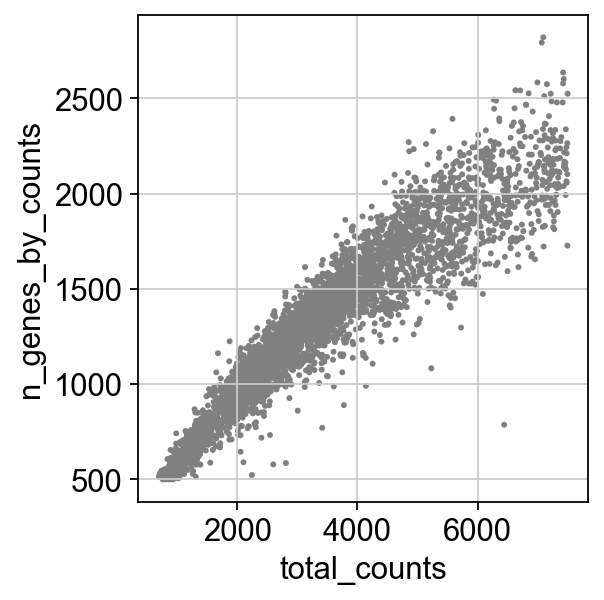

In [15]:
sc.pl.scatter(e135, x='total_counts', y='n_genes_by_counts')

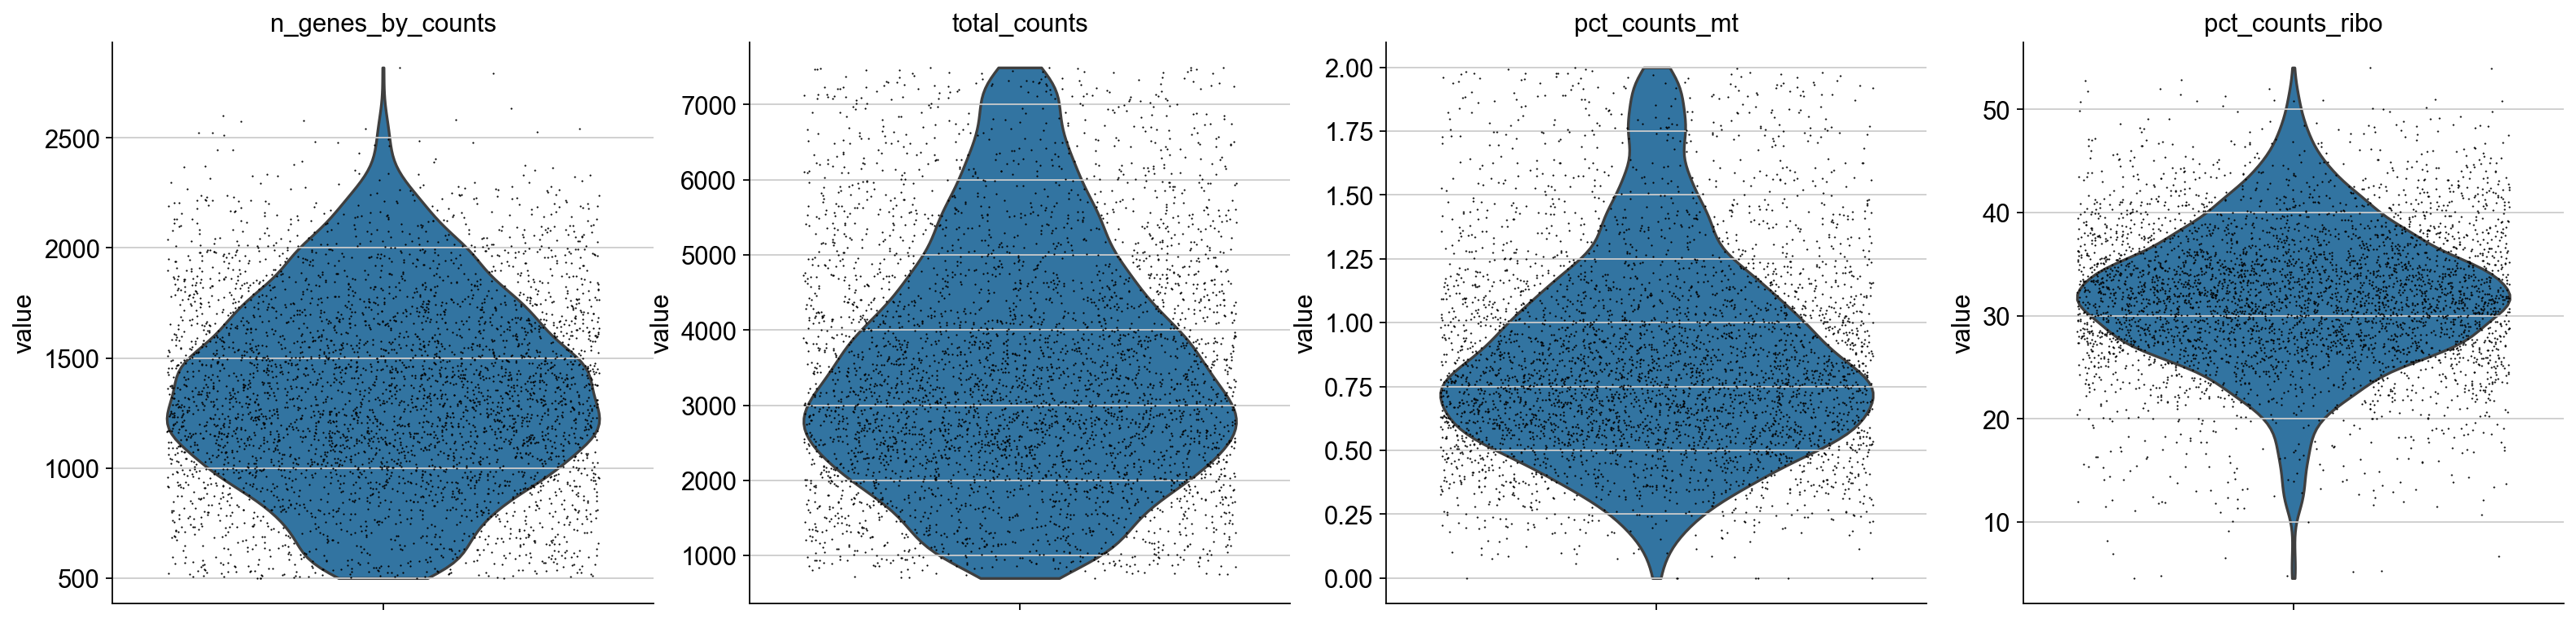

In [16]:
e135 = e135[e135.obs['total_counts'] < 18000, :]
e135 = e135[e135.obs['pct_counts_mt'] < 2.5, :]
# filter for percent ribo > 0.05
e135 = e135[e135.obs['pct_counts_ribo'] < 60, :]
axs = sc.pl.violin(e135, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

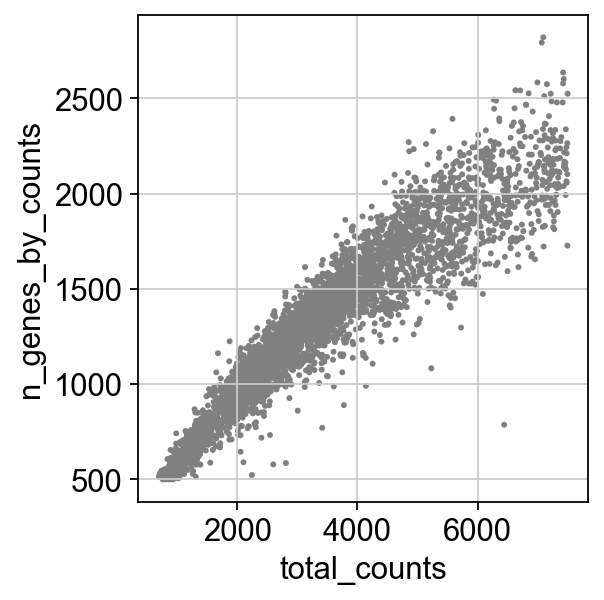

In [17]:
sc.pl.scatter(e135, x='total_counts', y='n_genes_by_counts')

In [18]:
sc.pp.calculate_qc_metrics(e135, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

In [19]:
e135 = e135[e135.obs['n_genes_by_counts'] > 500, :]

# Remove genes we don't care about (ribo, malat, mito) and are expressed in less than 5 cells

In [20]:
sc.pp.filter_genes(e135, min_cells=5)


print("Number of cells: ",e135.n_obs)

#save a copy of anndata before normalization 
e135 = e135.copy()

##remove MT, ribo, and maltat reads since these reads are highly abundant, but not relevant to expirement
mito_genes = e135.var_names.str.startswith("mt-")
ribo_genes = e135.var_names.str.startswith(("Rps","Rpl"))
malat_gene = e135.var_names.str.startswith("Malat1")

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, malat_gene)
keep = np.invert(remove)

print(len(remove))

print(np.count_nonzero(keep))
print(len(keep) - np.count_nonzero(keep))

e135 = e135[:,keep].copy()

print("Number of genes: ",e135.n_vars)

Number of cells:  4186
14294
14186
108
Number of genes:  14186


# SCN using Qin's data to train

Load in Qin's data

In [21]:
adTrain = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [22]:
adTrain.var_names_make_unique()

In [23]:
qDat = e135.copy()
qDat.var_names_make_unique()

In [24]:
genesTrain = adTrain.var_names
genesQuery = qDat.var_names
cgenes = genesTrain.intersection(genesQuery)
print(len(cgenes))

adTrain1 = adTrain[:,cgenes]
adQuery = qDat[:,cgenes].copy()
adTrain1 = adTrain1[~adTrain1.obs.index.duplicated()]

14186


In [25]:
qDat.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
qb_E13-5_gdf:AAACCTGAGTTGCAGGx-1-0-0,e13.5,joint,SC2,SC2_A,SC2_A3,GLE,0,2029,7319.0,2999.0,40.975544,54.0,0.737806
qb_E13-5_gdf:AAACCTGGTAAGTGTAx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A4,GLE,0,964,2168.0,812.0,37.453876,25.0,1.153136
qb_E13-5_gdf:AAACCTGGTCTTGCGGx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A3,GLE,0,2074,6008.0,1605.0,26.714382,28.0,0.466045
qb_E13-5_gdf:AAACCTGGTGGGTCAAx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A3,GLE,0,979,2331.0,750.0,32.175030,22.0,0.943801
qb_E13-5_gdf:AAACCTGTCAAAGTAGx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A1,GLE,0,979,2409.0,809.0,33.582397,35.0,1.452885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E13-5_gdf:TTTGTCAAGTCCAGGAx-1-0-1,e13.5,ncc,ncc,ncc,ncc,non-GLE,1,1337,2924.0,916.0,31.326950,43.0,1.470588
qb_E13-5_gdf:TTTGTCACATGGATGGx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1,2394,6357.0,1700.0,26.742176,82.0,1.289917
qb_E13-5_gdf:TTTGTCACATTGGGCCx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1,1507,3891.0,1098.0,28.218967,43.0,1.105114
qb_E13-5_gdf:TTTGTCAGTATCGCATx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1,1460,3951.0,1343.0,33.991394,20.0,0.506201


In [26]:
qDat.var

,Accession,Chromosome,End,Start,Strand,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,False,False,7,0.003104,99.832856,13.0,7
Mrpl15,ENSMUSG00000033845,1,4785739,4773206,-,False,False,260,0.066858,93.791786,280.0,260
Rgs20,ENSMUSG00000002459,1,5070285,4909576,-,False,False,6,0.001433,99.856734,6.0,6
4732440D04Rik,ENSMUSG00000090031,1,6215293,6209866,-,False,False,6,0.001433,99.856734,6.0,6
Gm26901,ENSMUSG00000097797,1,7397869,7349406,-,False,False,5,0.001433,99.880611,6.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
Ddx3y,ENSMUSG00000069045,Y,1286629,1260771,-,False,False,976,0.290115,76.695320,1215.0,975
Kdm5d,ENSMUSG00000056673,Y,956786,897788,+,False,False,34,0.008596,99.188157,36.0,34
Eif2s3y,ENSMUSG00000069049,Y,1028847,1010543,+,False,False,583,0.152340,86.079274,638.0,583
Gm29650,ENSMUSG00000099876,Y,1049134,1048393,+,False,False,9,0.002149,99.785100,9.0,9


# Split training data into two to check classifer later

In [27]:
expTrain, expVal = pySCN.splitCommonAnnData(adTrain1, ncells=200,dLevel="level2")

2 : 
354
7 : 
48
1 (chon) : 
90
9 (divi) : 
141
dermis : 
964
SC2_B : 
495
endothelial : 
23
3 : 
251
0 : 
22
4 : 
209
8 (prog) : 
123
erythro : 
6
myocyte : 
1128
ncc : 
78
5 : 
5
SC3_B : 
1070
melanocyte : 
15
7 (prog) : 
51
8 : 
25
SC2_A : 
627
5 (stro) : 
633
blood : 
286
SC1_B : 
895
2 (liga) : 
54
SC3_A : 
2451
6 : 
52
SC1_A : 
1791
4 (synfib) : 
26
3 (line) : 
49
6 (stro) : 
134


# Train the classifer

In [28]:
[cgenesA, xpairs, tspRF] = pySCN.scn_train(expTrain, nTopGenes = 100, nRand = 100, nTrees = 1000, nTopGenePairs = 100, dLevel = "level2", stratify=True, limitToHVG=True)

HVG
Matrix normalized
There are  1623  classification genes

0
1 (chon)
2
2 (liga)
3
3 (line)
4
4 (synfib)
5
5 (stro)
6
6 (stro)
7
7 (prog)
8
8 (prog)
9 (divi)
SC1_A
SC1_B
SC2_A
SC2_B
SC3_A
SC3_B
blood
dermis
endothelial
erythro
melanocyte
myocyte
ncc
There are 2883 top gene pairs

Finished pair transforming the data



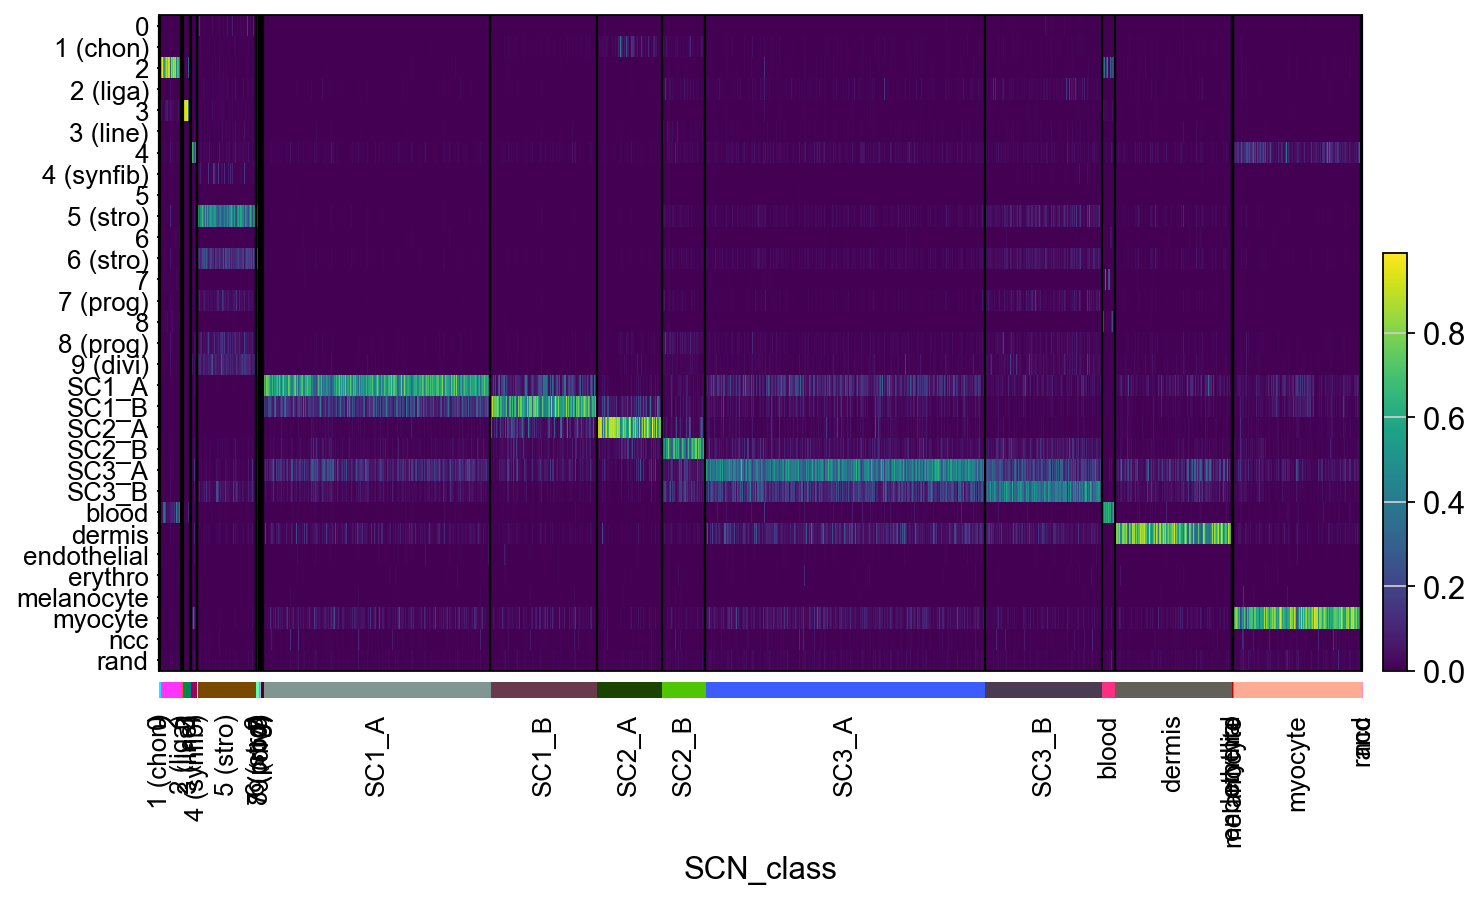

In [29]:
adVal = pySCN.scn_classify(expVal, cgenesA, xpairs, tspRF, nrand = 0)

ax = sc.pl.heatmap(adVal, adVal.var_names.values, groupby='SCN_class', cmap='viridis', dendrogram=False, swap_axes=True)

In [30]:
adQd5 = pySCN.scn_classify(adQuery, cgenesA, xpairs, tspRF, nrand = 0)

In [31]:
adQuery.obs = pd.concat([adQuery.obs, adQd5.obs['SCN_class']], axis=1)

# count normalization

In [32]:
e135 = adQuery.copy()

In [33]:
e135.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e135_SCN.h5ad")

In [34]:
adata = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e135_SCN.h5ad")

In [35]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [36]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.25)

In [37]:
sc.pp.scale(adata, max_value=10)

# PCA

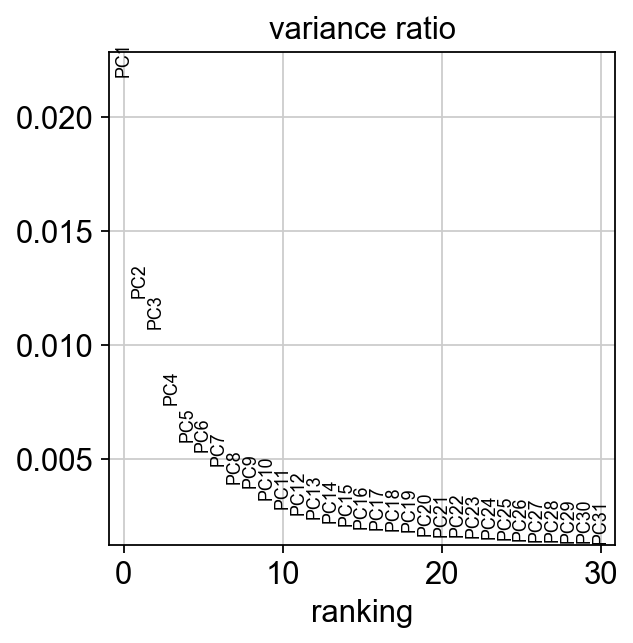

In [38]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)
sc.pl.pca_variance_ratio(adata)

# fine neighbors

In [39]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution =.3)
sc.tl.umap(adata, .25)

In [40]:
adata.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt,SCN_class,leiden
qb_E13-5_gdf:AAACCTGAGTTGCAGGx-1-0-0,e13.5,joint,SC2,SC2_A,SC2_A3,GLE,0,2029,7319.0,2999.0,40.975544,54.0,0.737806,SC2_A,3
qb_E13-5_gdf:AAACCTGGTAAGTGTAx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A4,GLE,0,964,2168.0,812.0,37.453876,25.0,1.153136,SC3_A,0
qb_E13-5_gdf:AAACCTGGTCTTGCGGx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A3,GLE,0,2074,6008.0,1605.0,26.714382,28.0,0.466045,dermis,4
qb_E13-5_gdf:AAACCTGGTGGGTCAAx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A3,GLE,0,979,2331.0,750.0,32.175030,22.0,0.943801,SC3_B,4
qb_E13-5_gdf:AAACCTGTCAAAGTAGx-1-0-0,e13.5,joint,SC3,SC3_A,SC3_A1,GLE,0,979,2409.0,809.0,33.582397,35.0,1.452885,SC3_A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E13-5_gdf:TTTGTCAAGTCCAGGAx-1-0-1,e13.5,ncc,ncc,ncc,ncc,non-GLE,1,1337,2924.0,916.0,31.326950,43.0,1.470588,ncc,7
qb_E13-5_gdf:TTTGTCACATGGATGGx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1,2394,6357.0,1700.0,26.742176,82.0,1.289917,dermis,1
qb_E13-5_gdf:TTTGTCACATTGGGCCx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1,1507,3891.0,1098.0,28.218967,43.0,1.105114,dermis,1
qb_E13-5_gdf:TTTGTCAGTATCGCATx-1-0-1,e13.5,dermis,dermis,dermis,dermis,non-GLE,1,1460,3951.0,1343.0,33.991394,20.0,0.506201,dermis,1


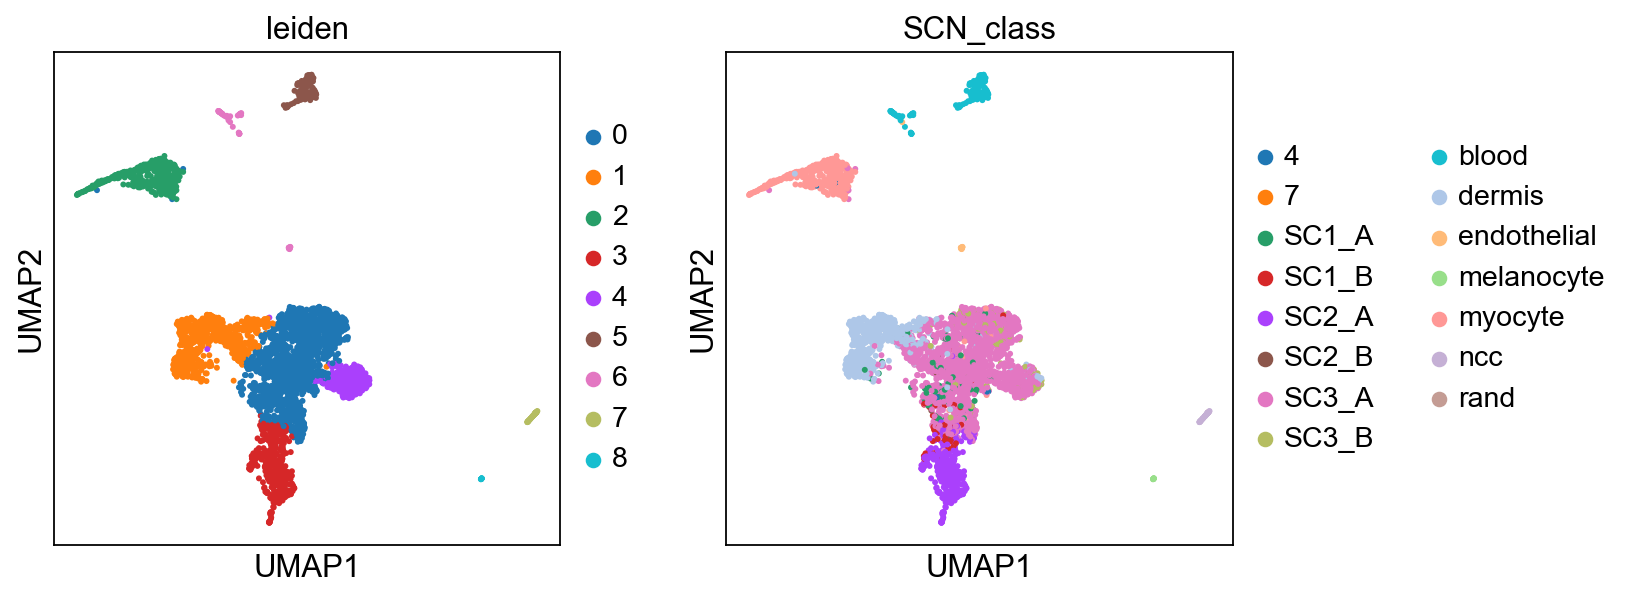

In [41]:
sc.pl.umap(adata, color=['leiden', 'SCN_class'], palette=sc.pl.palettes.default_20, )

In [42]:
adata.var_names

Index(['Sox17', 'Mrpl15', 'Rgs20', '4732440D04Rik', 'Gm26901', 'Mybl1',
       'Vcpip1', 'Snhg6', 'Tcf24', 'Cops5',
       ...
       'Gpm6b', 'Trappc2', 'Arhgap6', 'Gm21887', 'Uty', 'Ddx3y', 'Kdm5d',
       'Eif2s3y', 'Gm29650', 'Gm47283'],
      dtype='object', length=14186)

In [43]:
adata.obs["level3"].value_counts()

SC3_A1         1540
dermis          620
myocyte         502
SC3_A2          311
SC3_A3          270
SC3_A4          215
blood           185
SC2_A1          175
SC2_A3           91
SC2_A4           66
ncc              53
SC1_A4           29
SC2_A6           27
SC2_A5           18
SC3_B1           13
SC1_B3           12
SC3_B4           12
melanocyte       11
endothelial      11
SC1_A1            9
SC1_B5            3
SC1_A2            3
SC1_B4            2
SC2_A2            2
SC2_B5            2
SC3_B3            2
SC1_B1            1
erythro           1
Name: level3, dtype: int64

In [44]:
adata = adata[~(adata.obs["level3"] == "SC1_B1")]
adata = adata[~(adata.obs["level3"] == "erythro")]
adata.obs["level3"].value_counts()

SC3_A1         1540
dermis          620
myocyte         502
SC3_A2          311
SC3_A3          270
SC3_A4          215
blood           185
SC2_A1          175
SC2_A3           91
SC2_A4           66
ncc              53
SC1_A4           29
SC2_A6           27
SC2_A5           18
SC3_B1           13
SC3_B4           12
SC1_B3           12
endothelial      11
melanocyte       11
SC1_A1            9
SC1_A2            3
SC1_B5            3
SC2_B5            2
SC2_A2            2
SC3_B3            2
SC1_B4            2
Name: level3, dtype: int64

In [46]:
# 클러스터링 결과로 rank_genes_groups를 실행
sc.tl.rank_genes_groups(adata, 'level3', use_raw=False)

# 상위 순위 유전자 목록 추출
top_genes_per_cluster = adata.uns['rank_genes_groups']['names']

# 데이터프레임 생성
gene_df = pd.DataFrame(top_genes_per_cluster)

# 상위 50개 유전자만 선택
gene_df = gene_df.iloc[:, :100]

# 데이터프레임을 엑셀 파일로 저장
gene_df.to_excel('C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/excel/SCN_cluster/e135_SCN_cluster_rank_genes_level3.xlsx', index=False)